In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic
En este proyecto tenemos un conjunto de datos sobre los pasajeros que iban en el *Titanic* sin tomar en cuenta a la tripulacion de la misma. Este conjunto de datos cuenta con el aproximado del 80% de los pasajeros.

***
**Fuente**: Hind, Philip.  "Encyclopedia Titanica."  Online.  Internet.
n.p.  02 Aug 1999.

****

## Descripcion de variables
*pclass* - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

*survival* - Survival (0 = No; 1 = Yes)

*name* - Name

*sex* - Sex

*age* - Age

*sibsp* - Number of Siblings/Spouses Aboard

*parch* - Number of Parents/Children Aboard

*ticket* - Ticket Number

*fare* - Passenger Fare

*cabin* - Cabin

*embarked* - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

*boat* - Lifeboat

*body* - Body Identification Number

*home.dest* - Home/Destination

****

### Notas Especiales

*Pclass* es un aproximado del estatus socioeconómico

*Age* es en años; Edad en decimales es menor a uno (1)


In [66]:
data = pd.read_csv('/content/sample_data/titanic3.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [68]:
data.shape # Cantidad de filas y columnas del conjunto original

(1309, 14)

Para asegurarnos de que no exista una fila completa con datos nulos la eliminamos completamente.

In [69]:
data = data.dropna(axis=0, how="all") # Borramos las filas de nuestro dataset en donde tenga todos los valores nulos
print(data.shape)

(1309, 14)


### Información del conjunto

Ahora que conocemos la cantidad de registros que tenemos en nuestro conjunto podemos ver información general como la cantidad de datos no nulos por columnas y el tipo de dato que almacena cada columna. En la siguiente celda podemos ver que hay columnas que cuentan con todos los datos y hay columnas que no.

Por ejemplo, en la columna *body* es en donde menos datos se encuentran. Esto se debe a que en esta columna se encuentra el número de identificación que se le asigno a los cuerpos de las personas fallecidas pero, si estos sobrevivieron o el cuerpo no se encontro no tiene ningun valor asignado.

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 185.7+ KB


****

### Cantidad de sobrevivientes

Recordando la forma en la que se asignaron los valores en esta columna sabemos que el cero representa a aquellos pasajeros que no sobrevivieron y uno los que sí sabemos que del total de pasajeros:

**809** NO sobrevivieron

**500** SI sobrevivieron

Con esto podemos ver que de las *809* personas que fallecieron solamente se encontraron 121 cuerpos.

In [71]:
data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

****
### Cantidad de pasajeros por sexo

**843** Hombres

**466** Mujeres

In [72]:
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

****
## ¿Cuántos sobrevivientes son hombres y cuántos son mujeres?

Sabemos que de los *500* pasajeros los sobrevivientes *339* de ellos eran mujeres y *161* eran hombres. Con esto podemos ver se tenia prioridad por las mujeres al momento de salvar a los pasajeros del Titanic.

In [99]:
survivdedFemale = data[(data['survived'] == 1) & (data['sex'] == "female")]
survivdedFemale = survivdedFemale['survived'].sum()
survivdedFemale

339

In [101]:
survivdedMale = data[(data['survived'] == 1) & (data['sex'] == "male")]
survivdedMale = survivdedMale['survived'].sum()
survivdedMale

161

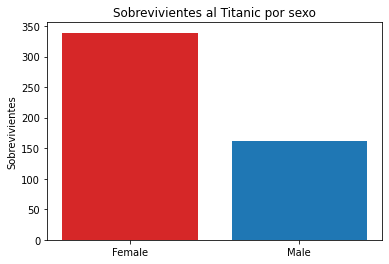

In [110]:
survivded = [survivdedFemale, survivdedMale]
sex = ['Female', 'Male']
bar_colors = ['tab:red', 'tab:blue']
fig, ax = plt.subplots()
ax.bar(sex, survivded, color=bar_colors)
ax.set_ylabel('Sobrevivientes')
ax.set_title('Sobrevivientes al Titanic')

plt.show()

Porcentaje de mujeres y hombres sobrevivientes. 

In [135]:
data[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


****
## Rango de edad de los pasajeros

Vemos que el rango principal de edad de los pasajeros se encuentra entre los 15-35 años

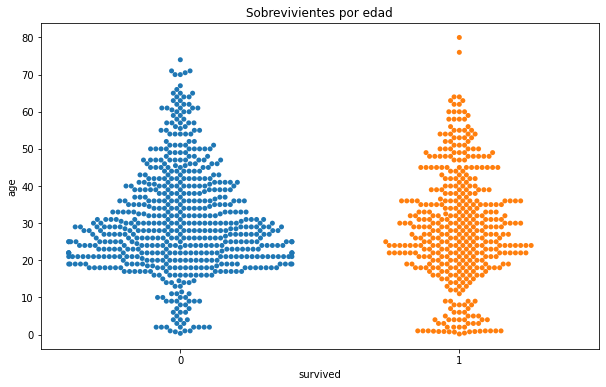

In [127]:
plt.figure(figsize=(10,6))
plt.title("Sobrevivientes por edad")
sns.swarmplot(x=data["survived"], y=data["age"])

plt.show()

****
## Sobrevivientes por la tarifa del boleto

Podemos ver que hay una gran cantidad de sobrevivientes con una tarifa alta. Además que los pasajeros que pagarón la tarifa más alta fueron salvados.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


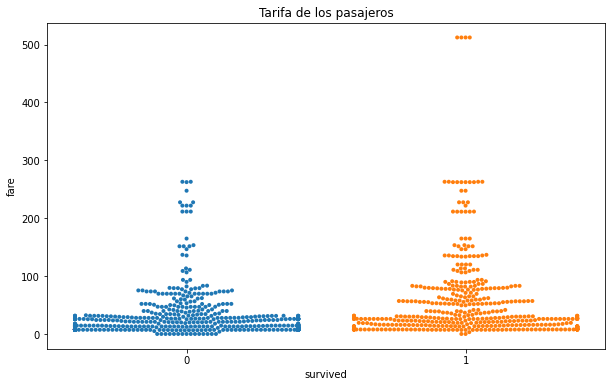

In [133]:
plt.figure(figsize=(10,6))
plt.title("Tarifa de los pasajeros")
sns.swarmplot(x=data['survived'], y=data['fare'], size=4)

plt.show()

Podemos ver que la cantidad de sobrevivientes fue mayor en la clase más alta respecto a las demas. 

In [134]:
data[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289
